# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ max

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

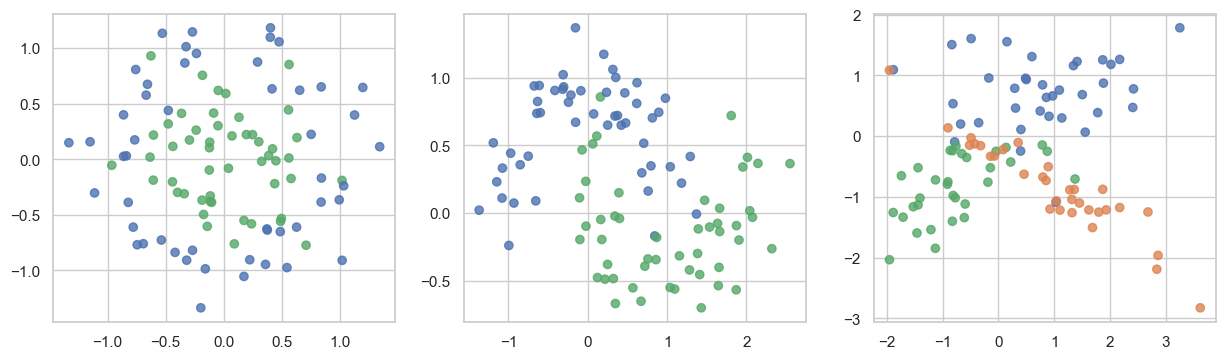

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

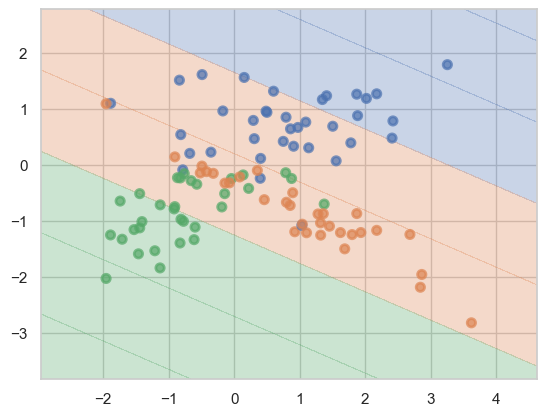

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def plot_area(dataset):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f'accuracy train {accuracy_score(y_train, clf.predict(X_train))}')
    
    print(f'accuracy test {accuracy_score(y_test, y_pred)}')
    
    plot_surface(clf, X_train, y_train)

accuracy train 1.0
accuracy test 0.7


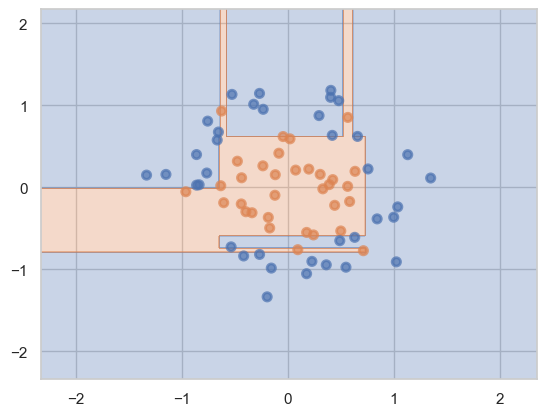

In [8]:
plot_area(datasets[0])

accuracy train 1.0
accuracy test 0.9


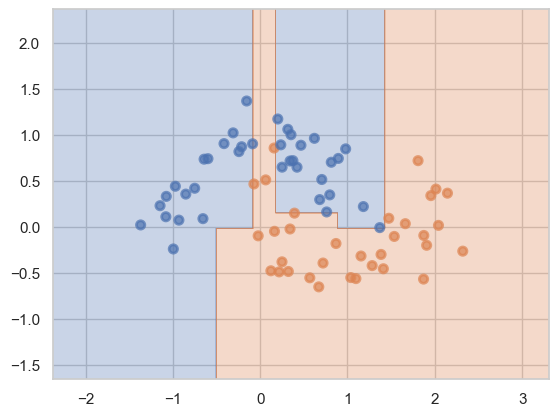

In [9]:
plot_area(datasets[1])

accuracy train 1.0
accuracy test 0.7


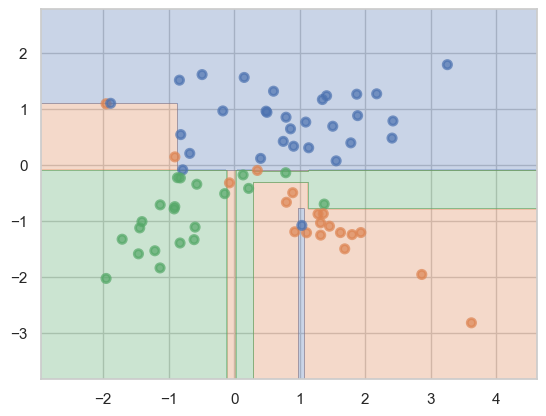

In [10]:
plot_area(datasets[2])

__Ответ:__ Думаю, что да тк везде есть тонкие выделенные области, которые дерево подгонят под конкретные объекты, а это и есть переобучение 

А также идеальное качество на тесте 

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [11]:
a = np.arange(1, 5)
b = np.arange(3, 8)

m = np.meshgrid(a, b)
mm = np.array(m).T.reshape(-1, 2)
for i, j in mm:
    print(i, j)

1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 3
3 4
3 5
3 6
3 7
4 3
4 4
4 5
4 6
4 7


In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


def plot_surface_modif(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    
    
    
def plot_area_modif(dataset, verbose=False):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    
    depths = np.arange(2, 7)
    leafs = np.arange(1, 5)
    
    params = np.array(np.meshgrid(depths, leafs)).T.reshape(-1, 2)
    
    
    f, ax = plt.subplots(depths.shape[0], leafs.shape[0], figsize=(20, 20))
    
    i = -1
    for d, l in params:
        i += 1
        clf = DecisionTreeClassifier(max_depth=d, min_samples_leaf=l)
        clf.fit(X_train, y_train)
        curr_ax = ax[i // leafs.shape[0], i % leafs.shape[0]]
        plot_surface_modif(clf, X_train, y_train, curr_ax)
        curr_ax.set(title={f'depth = {d}, leafs = {l}'})
        if verbose:
            print('============')
            print(f'depth = {d}')
            print(f'leafs = {l}')
            print(f'accuracy train {accuracy_score(y_train, clf.predict(X_train))}')
            print(f'accuracy test {accuracy_score(y_test, clf.predict(X_test))}')
    

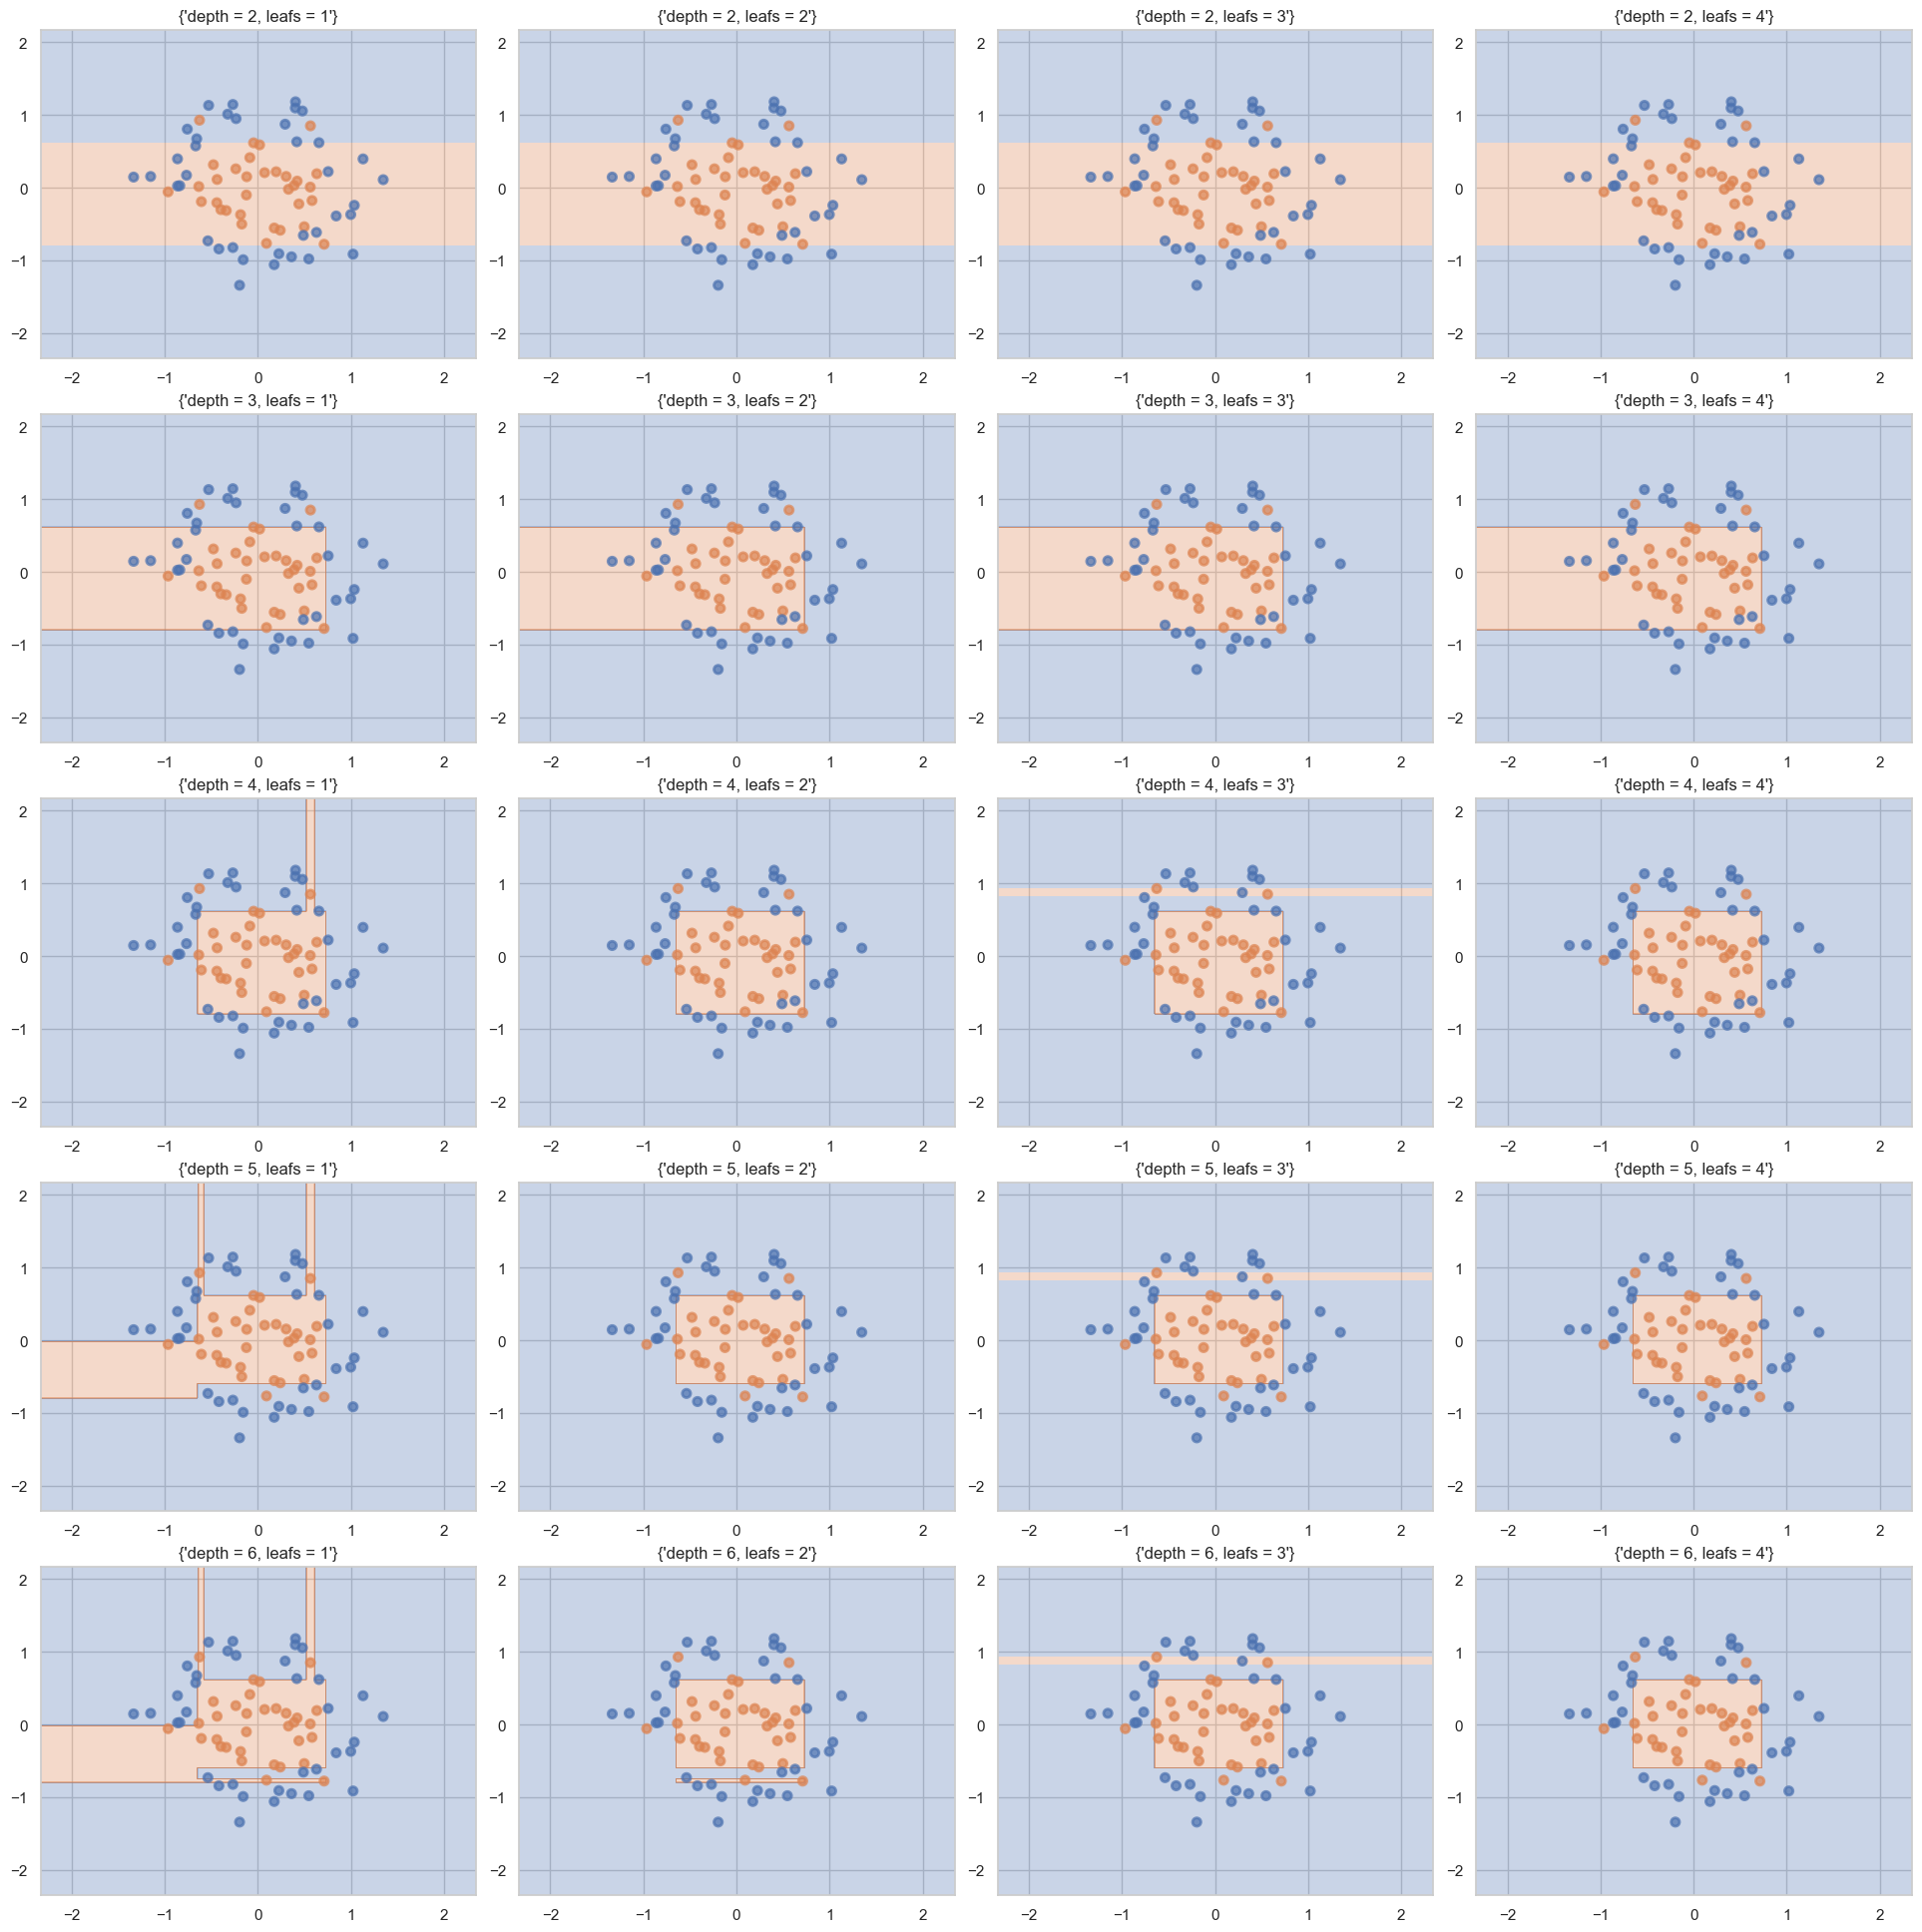

In [13]:
plot_area_modif(datasets[0])

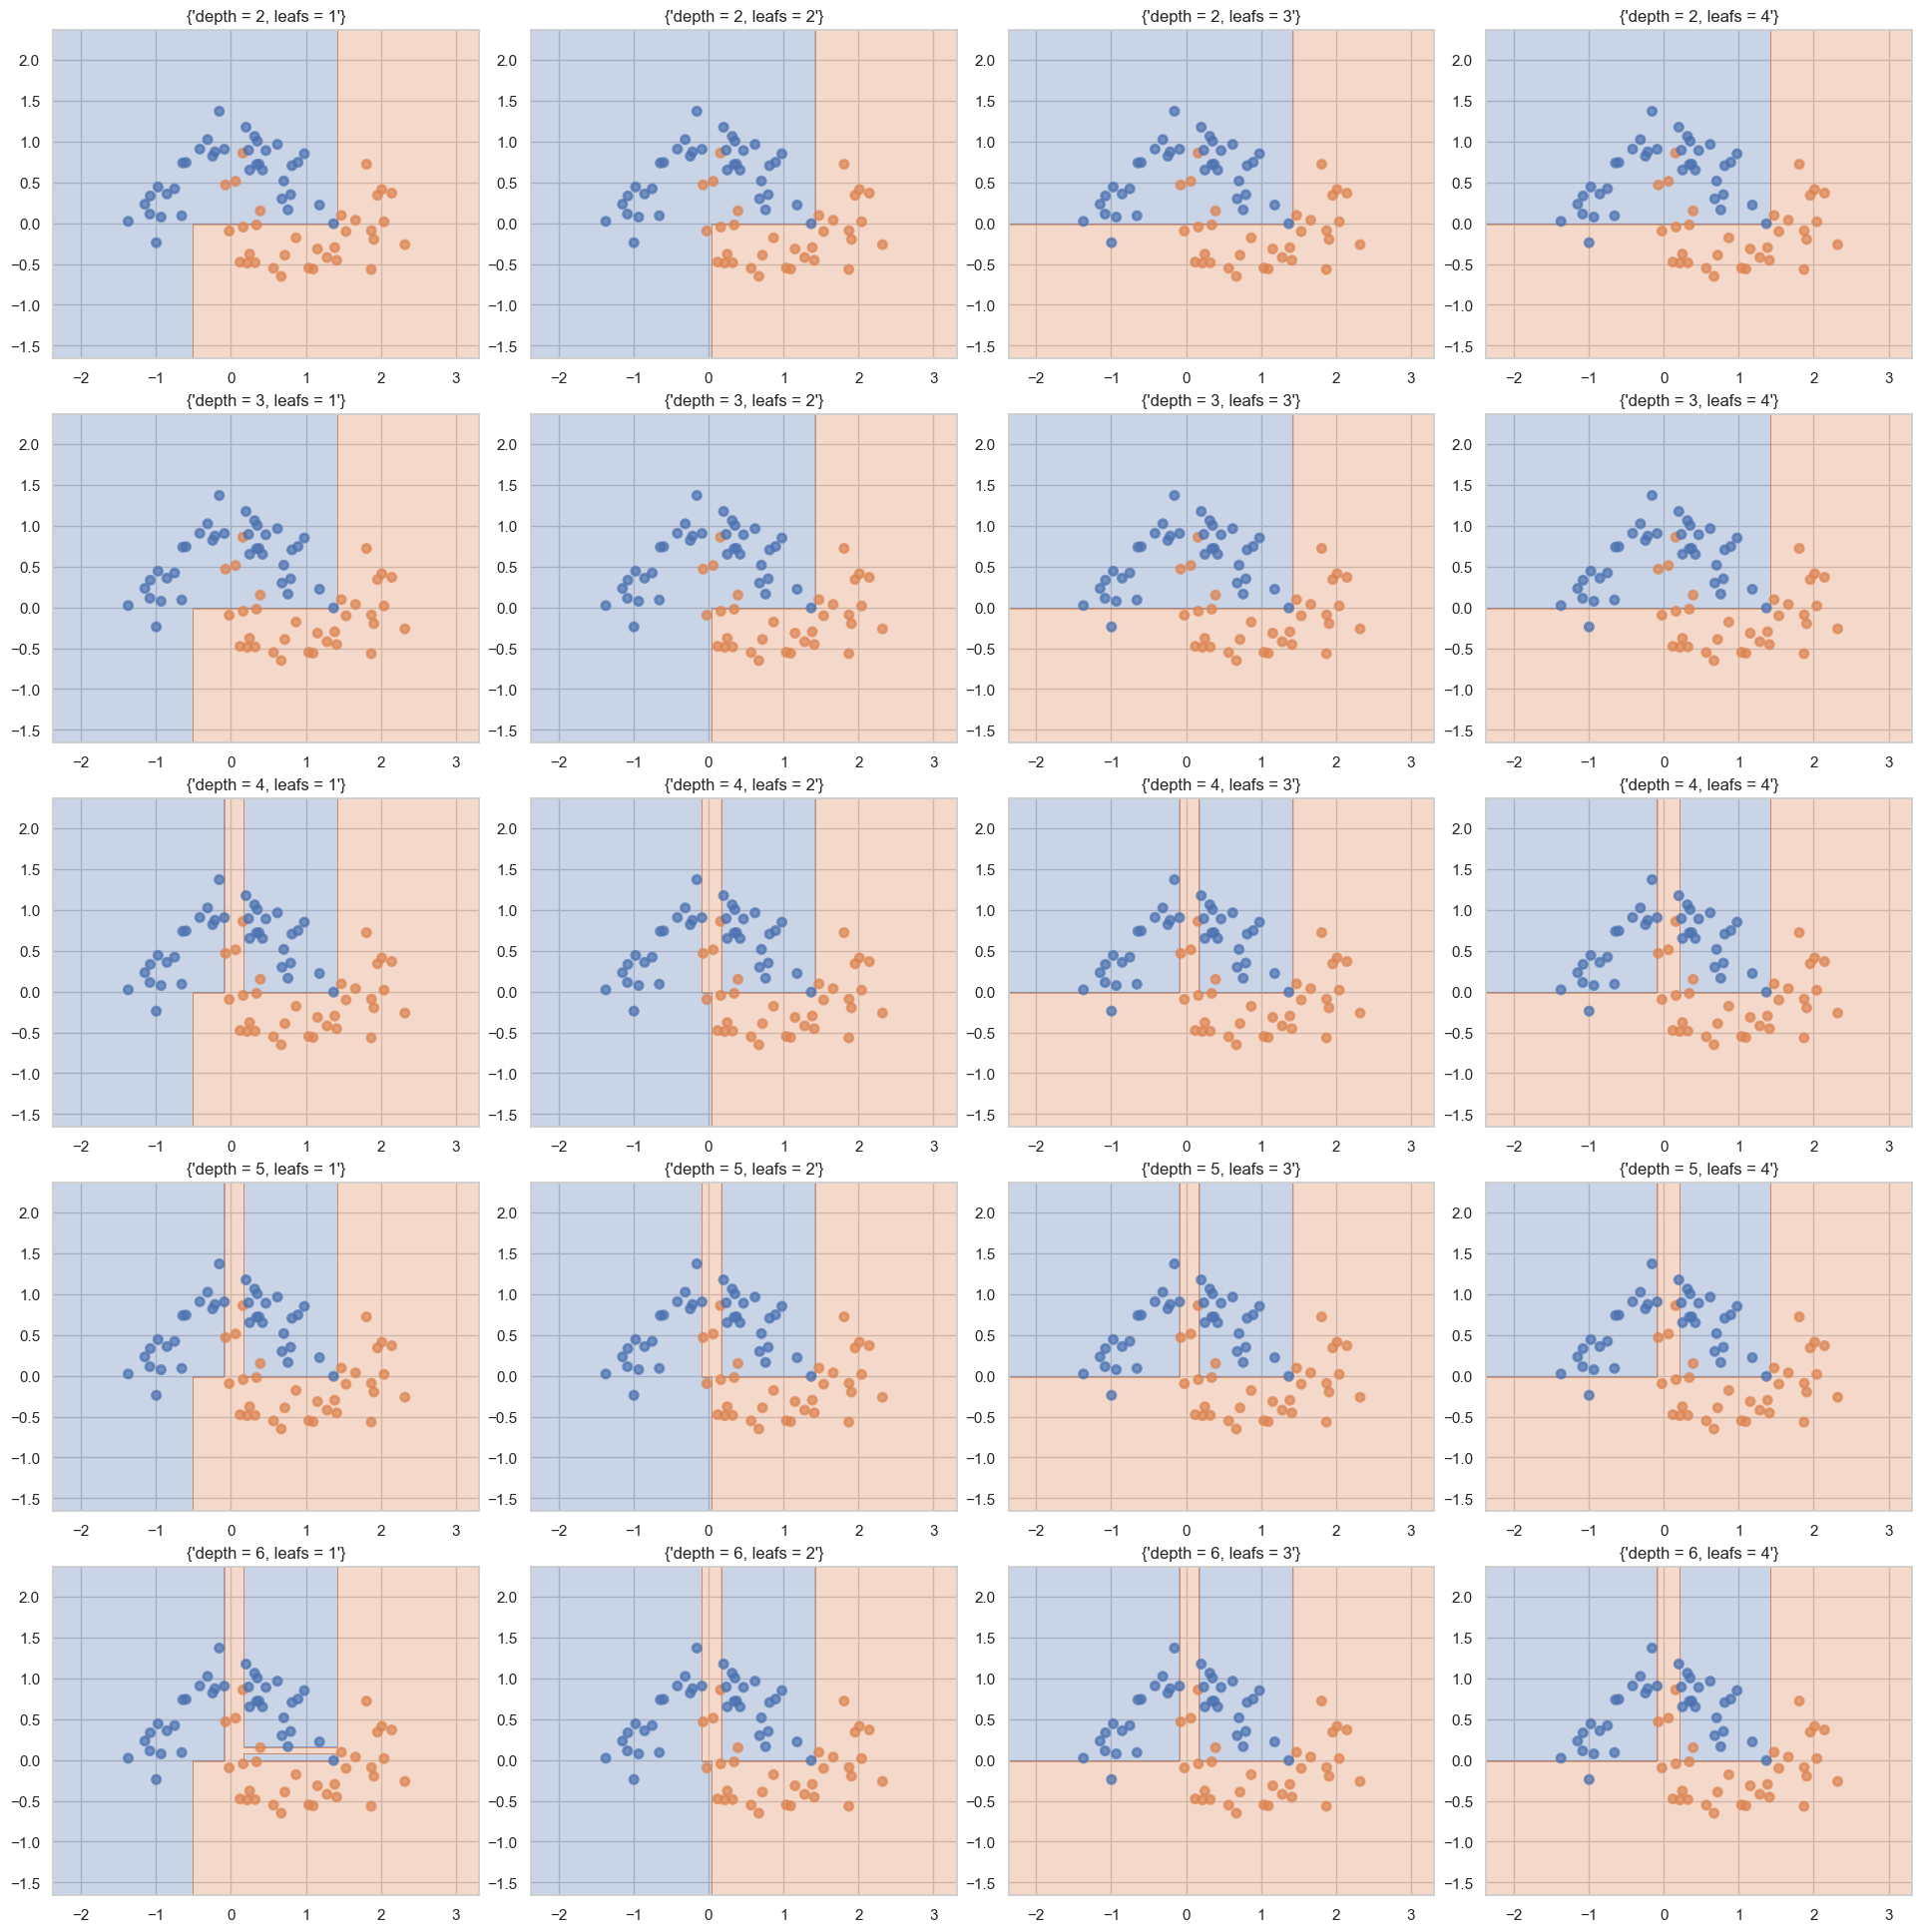

In [14]:
plot_area_modif(datasets[1])

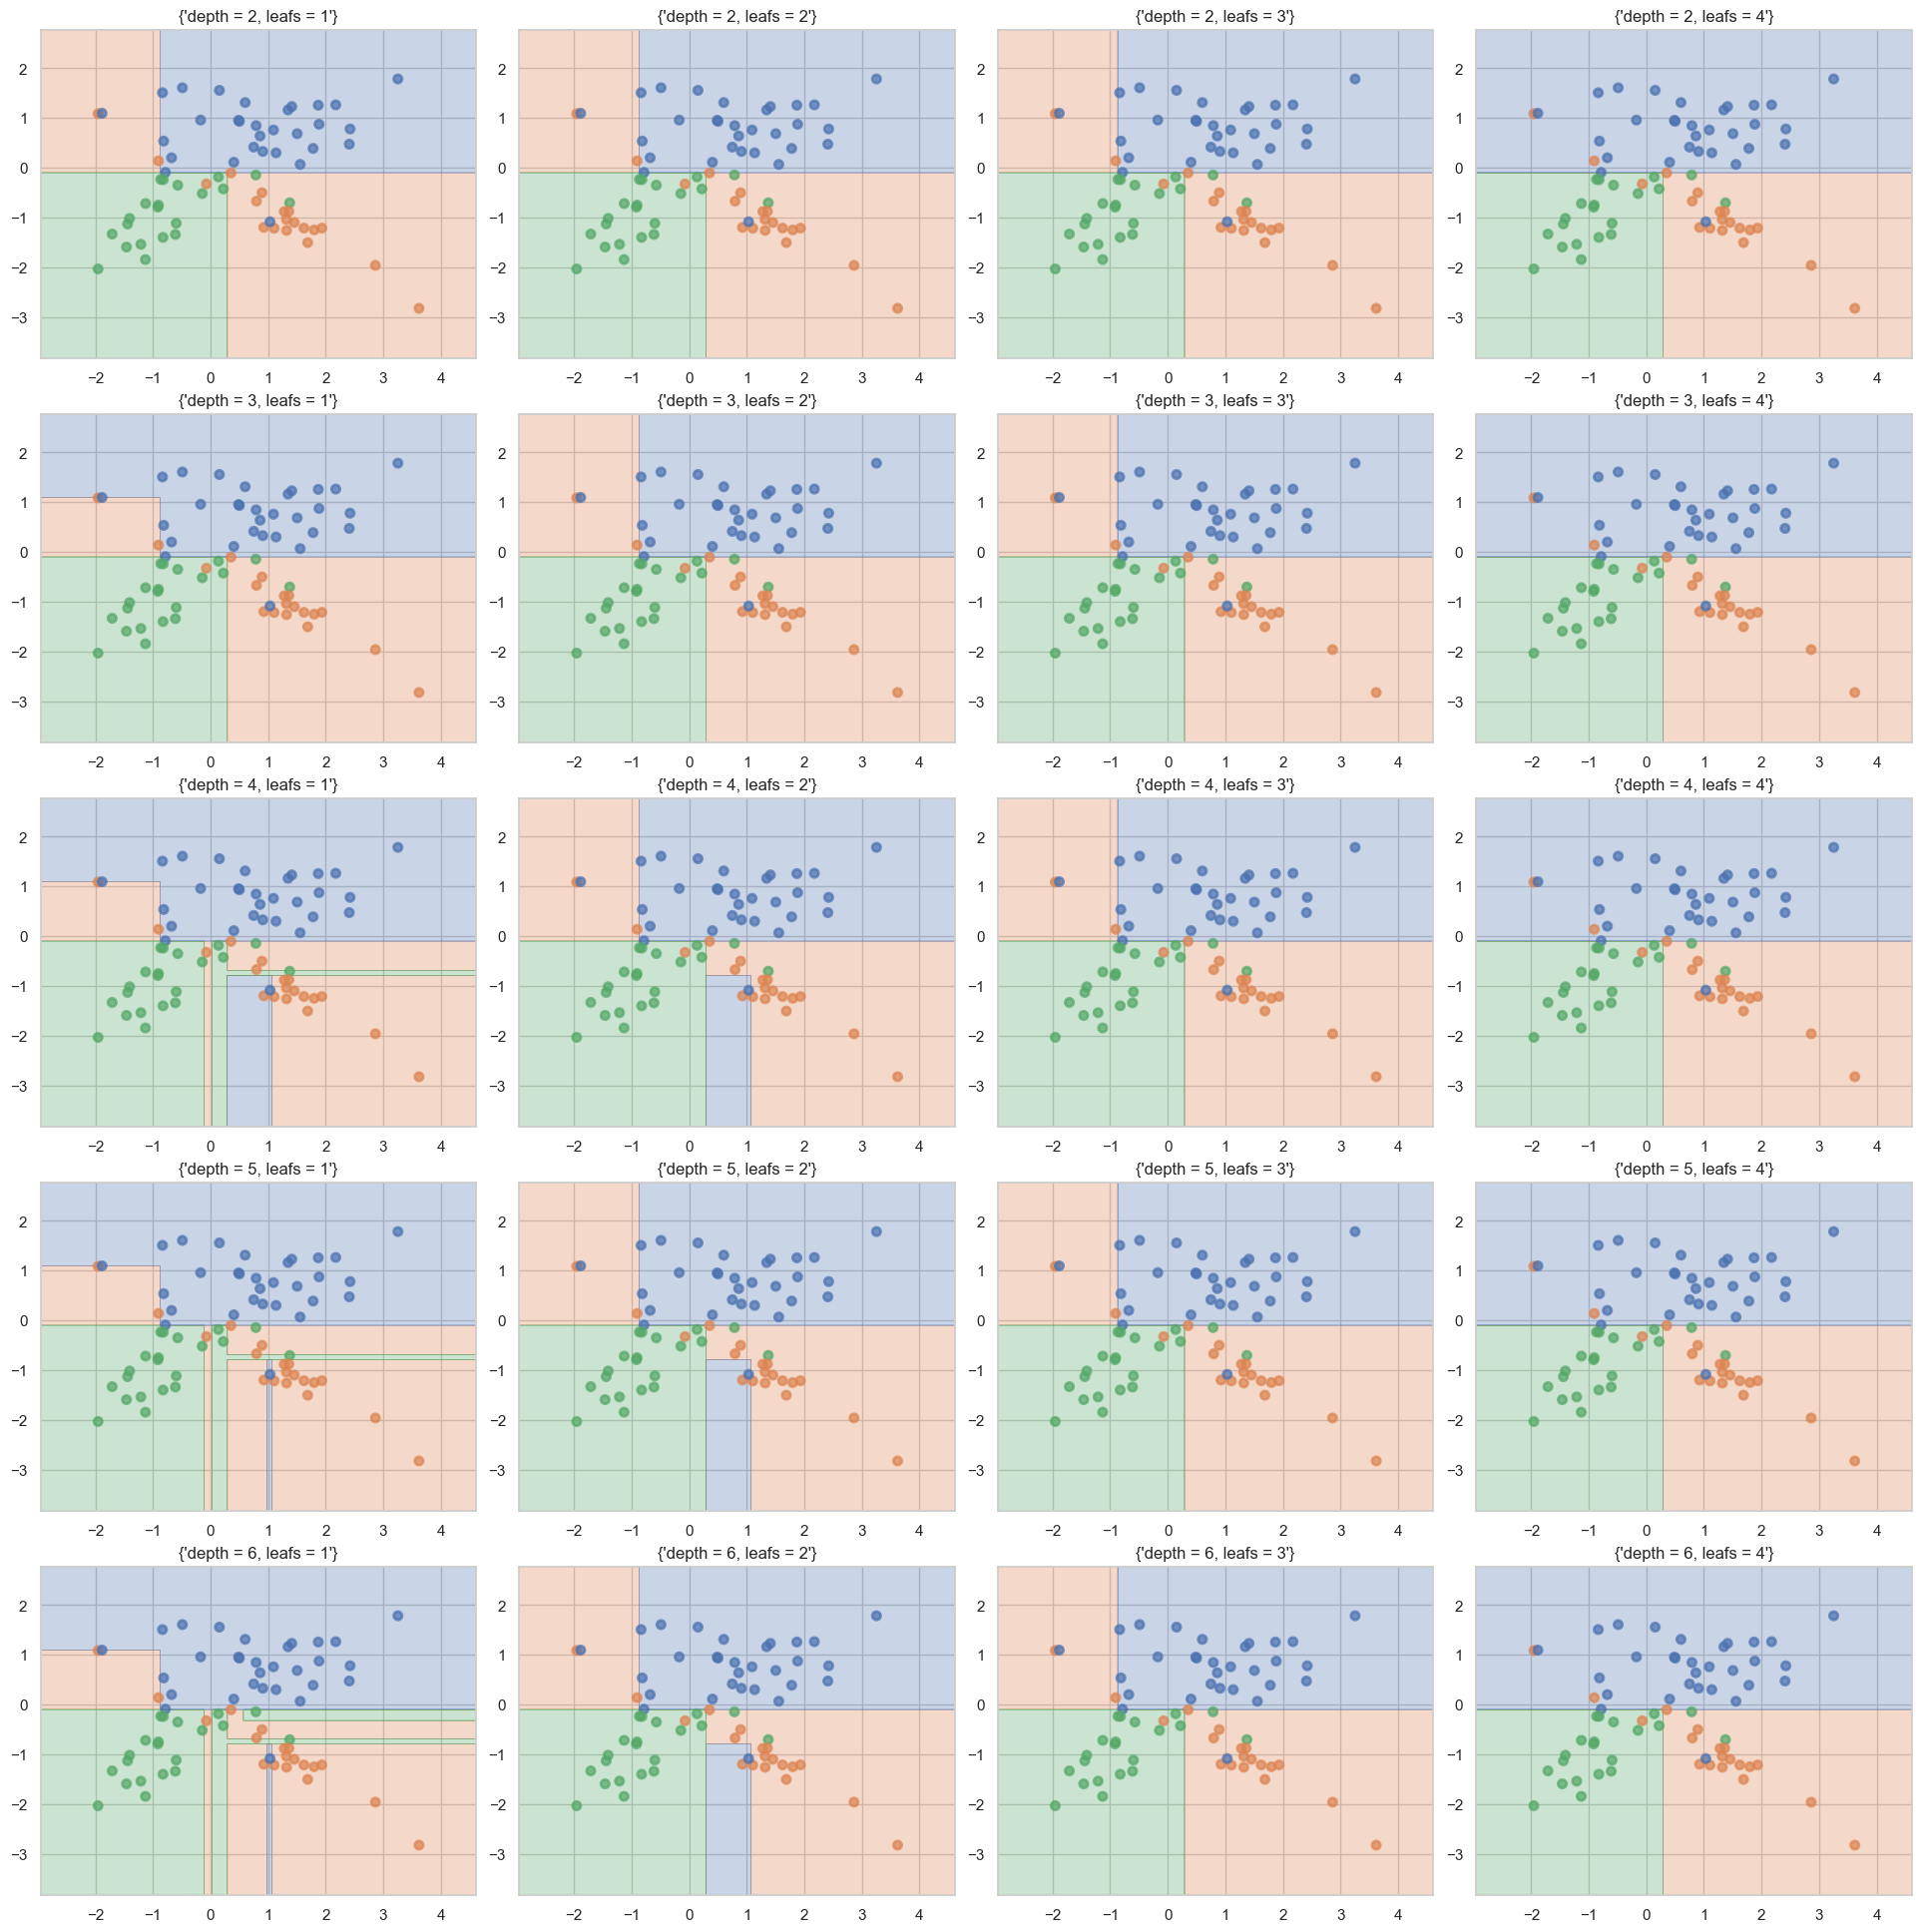

In [15]:
plot_area_modif(datasets[2])

__Ответ:__

Уменьшая глубину, можно избежать переобучения, тк разделяющая поверхность стоновиться проще и не так сильно подгоняется под обучающую выборку 

А с количеством элементов в листьях кажется ситуации противоположная, чем больше тем лучшую обощающую способность получаем 

Все это наблюдается среди всех датасетов одинаково, где-то чуть сильнее выражено, где-то меньше 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

In [16]:
a = np.array([1, 2,2,  3, 4, 5, 5])
c = np.cumsum(a)
c = np.unique(a, return_counts=True)[1]
np.cumsum(c)

array([1, 3, 4, 5, 7])

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/102695078/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [18]:
from hw5code import find_best_split

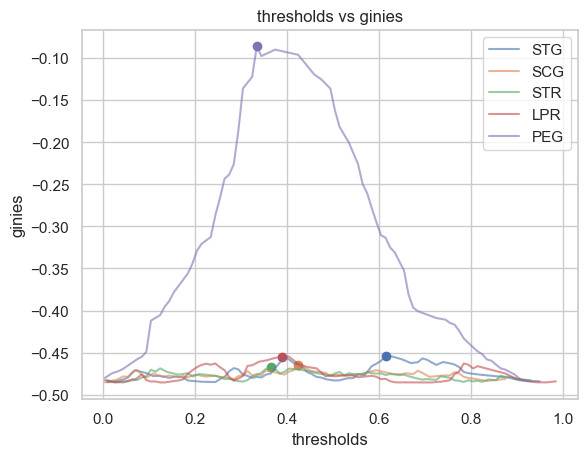

In [19]:
for col in data.columns[:-1]:
    thresholds, ginis, tbest, gbest = find_best_split(data[col].to_numpy(), data['UNS'].to_numpy())
    plt.plot(thresholds, ginis, label=col, alpha=0.6)
    plt.scatter(tbest, gbest)
    
plt.title('thresholds vs ginies')
plt.xlabel('thresholds')
plt.ylabel('ginies')
plt.legend()


сделаю boxplot тк с ним получается красивее и сразу все становиться понятно 

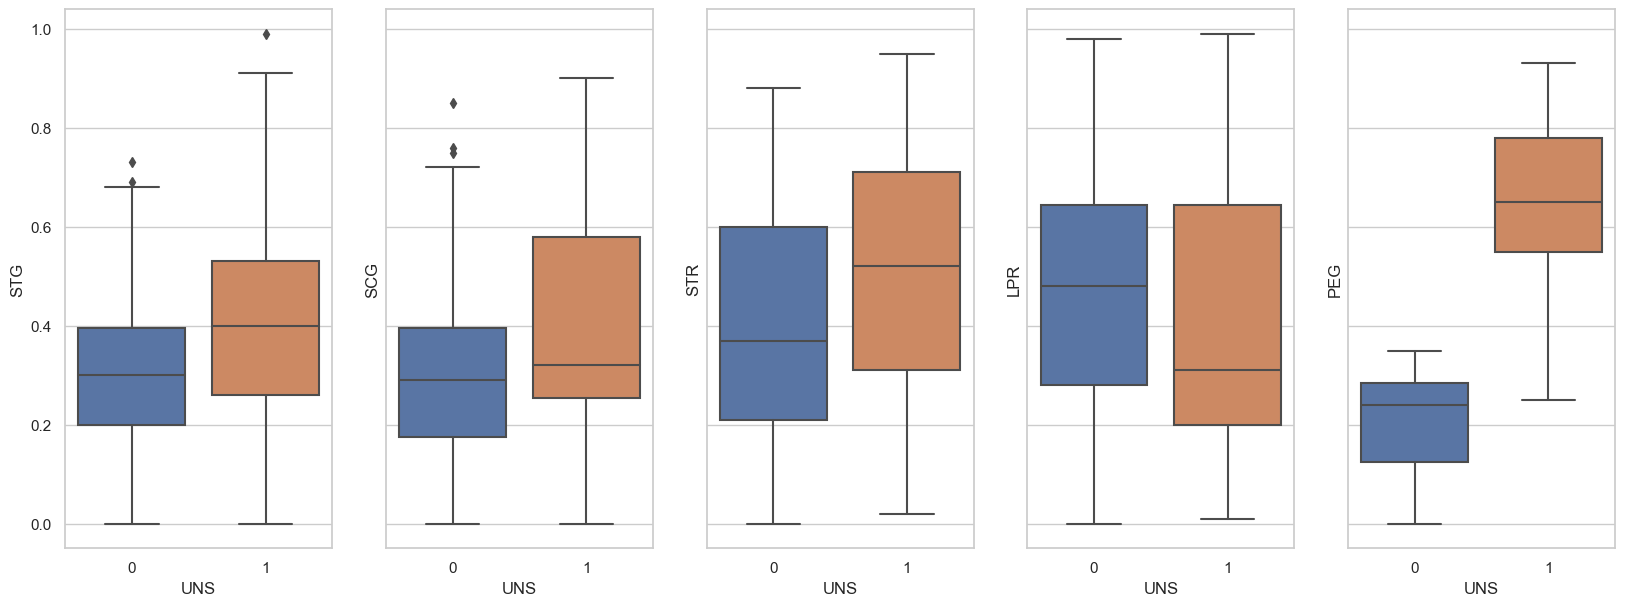

In [20]:
f, ax = plt.subplots(1, 5, figsize=(20, 7), sharey=True)

for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(y=data[col], x=data['UNS'], ax=ax[i])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Делить нужно по признаку PEG тк у него самый больщой джини, это также видно и на боксплоте, виден большой разрыв между "ящиками"

хорошие кривые - те которые похожи на нормальное распределение(можно поделить по верхушке)

плохие - те которые равномерны или рандомны, тк тут не понятно как лучше всего делить 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
 
 https://contest.yandex.ru/contest/56884/run-report/102922116/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('agaricus-lepiota.data')
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [22]:
%load_ext autoreload
%autoreload 2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='p'), 
                                                    data['p'], 
                                                    test_size = 0.5, 
                                                    random_state=43)

In [25]:
clf = DecisionTree(['categorical'] * X_train.shape[1])
clf.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = clf.predict(X_test.to_numpy())

print(accuracy_score(y_test, y_pred))
print(clf._depth)

0.999507631708518
7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [26]:
data = pd.read_csv('tic-tac-toe-endgame.csv')
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [27]:
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='V10'), 
                                                    data['V10'], 
                                                    test_size = 0.3, 
                                                    random_state=43)

In [29]:
test_res = []

for d in range(1, 15):
    clf = DecisionTree(['categorical'] * X_train.shape[1], max_depth=d)
    clf.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(X_test.to_numpy())
    test_res.append(accuracy_score(y_test, y_pred))


Text(0, 0.5, 'score')

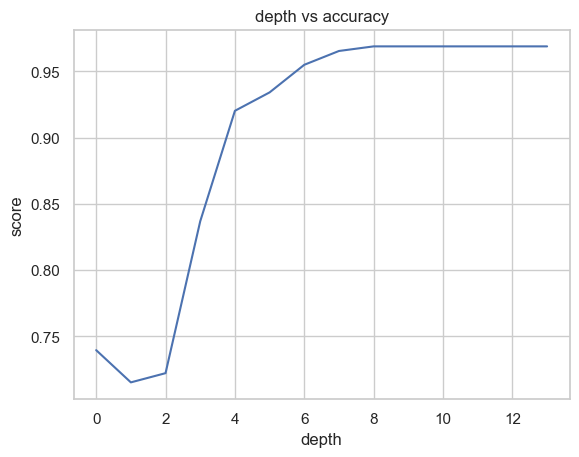

In [30]:
plt.plot(test_res)
plt.title('depth vs accuracy')
plt.xlabel('depth')
plt.ylabel('score')

In [31]:
test_res = []

for s in range(1, 15):
    clf = DecisionTree(['categorical'] * X_train.shape[1], min_samples_split=s)
    clf.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = clf.predict(X_test.to_numpy())
    test_res.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'score')

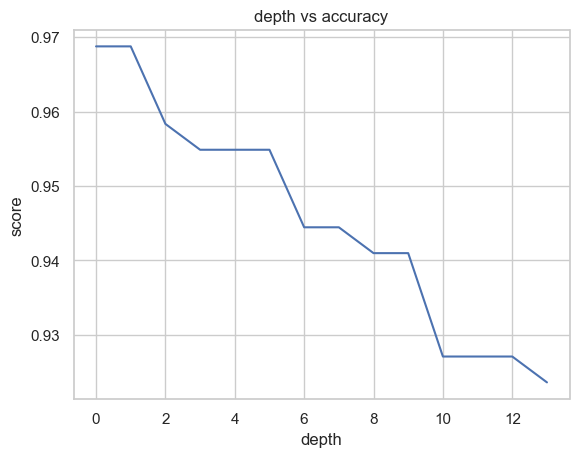

In [32]:
plt.plot(test_res)
plt.title('depth vs accuracy')
plt.xlabel('depth')
plt.ylabel('score')

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushrooms = pd.read_csv("agaricus-lepiota.data")
tictac = pd.read_csv("tic-tac-toe-endgame.csv")
car = pd.read_csv("car.data")
nursery = pd.read_csv("nursery.data")

encoder = LabelEncoder()

mushrooms = mushrooms.apply(encoder.fit_transform)

tictac = tictac.apply(encoder.fit_transform)

car['unacc'][(car['unacc'] == 'unacc') | (car['unacc'] == 'acc')] = 0
car['unacc'][(car['unacc'] == 'good') | (car['unacc'] == 'vgood')] = 1
car = car.apply(encoder.fit_transform)

nursery['recommend'][(nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')] = 0
nursery['recommend'][(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'priority') | (nursery['recommend'] == 'spec_prior')] = 1
nursery = nursery.apply(encoder.fit_transform)


In [34]:
X_mush, y_mush = mushrooms.drop(columns='p').to_numpy(), mushrooms['p'].to_numpy()
X_tictac, y_tictac = tictac.drop(columns='V10').to_numpy(), tictac['V10'].to_numpy()
X_car, y_car = car.drop(columns='unacc').to_numpy(), car['unacc'].to_numpy()
X_nurse, y_nurse = nursery.drop(columns='recommend').to_numpy(), nursery['recommend'].to_numpy()

datasets = [[X_mush, y_mush], 
            [X_tictac, y_tictac], 
            [X_car, y_car], 
            [X_nurse, y_nurse]]

names = ['mushrooms', 'tictac', 'cars', 'nursery']

In [35]:
%load_ext autoreload
%autoreload 2
from hw5code import DecisionTree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder


res = pd.DataFrame(columns=['real', 'categ', 'ohe', 'sklearn'])
for i, data in enumerate(datasets):
    X, y = data[0], data[1]
    
    features = ['real'] * X.shape[1]
    clf = DecisionTree(features)
    res_real = np.mean(cross_val_score(clf, 
                                       X, y, 
                                       cv=10, 
                                       scoring=make_scorer(accuracy_score)))
    
    features = ['categorical'] * X.shape[1]
    clf = DecisionTree(features)
    res_categ = np.mean(cross_val_score(clf, 
                                       X, y, 
                                       cv=10, 
                                       scoring=make_scorer(accuracy_score)))
    
    X_ohe = OneHotEncoder(sparse=False).fit_transform(X)
    features = ['real'] * X_ohe.shape[1]
    clf = DecisionTree(features)
    res_ohe = np.mean(cross_val_score(clf, 
                                       X_ohe, y, 
                                       cv=10, 
                                       scoring=make_scorer(accuracy_score)))
    
    clf = DecisionTreeClassifier()
    res_sklearn = np.mean(cross_val_score(clf, 
                                       X, y, 
                                       cv=10, 
                                       scoring=make_scorer(accuracy_score)))
    
    res.loc[names[i]] = [res_real, res_categ, res_ohe, res_sklearn]
    
res
    
    

,real,categ,ohe,sklearn
mushrooms,0.999261,1.000000,0.999631,0.958290
tictac,0.467533,0.541458,0.543575,0.758180
cars,0.942600,0.967519,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


<Axes: >

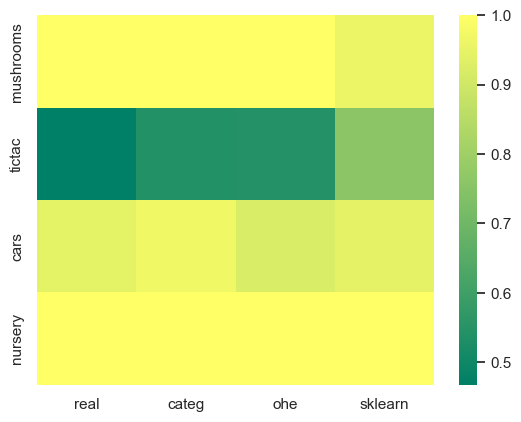

In [37]:
import seaborn as sns
sns.heatmap(res, cmap='summer')

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**


- библиотечная версия показывает себя в среднем лучше самописных (везде неплохой скор > 94 + самый лучший для тиктака), но немного не дотягивает до такого же качества, зато есть стабильность

- среди самописных алгоритмов,  использование категориальных признаков дает наилучший результат, ohe совсем немного лучше численных, но све равно проигрывает категорильным 

- Датасет про конфеты (типо шутка про тиктак) явно хуже остальных, на нем модели показывает наихудшее качество 

- Наверное случайность есть, тк мы используем кроссвалидацию и там есть рандовное деление на фолды + может что-то рандомное есть в библиотечной версии

Вставьте что угодно, описывающее ваши впечатления от этого задания:

https://t.ly/qCXco